Import Library

In [13]:
import pandas as pd

In [14]:
import numpy as np

In [15]:
import matplotlib.pyplot as plt

In [16]:
import seaborn as sns

Import Data

In [17]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

Analysing Data

In [18]:

df.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  Num Of Products  Has Credit Card  Is Active Member  \
0       0.00                1                1                 1   
1   83807.86                1                0                 1   
2  159660.80                3                1                 0   
3       0.00                2                0                 0   
4  125510.82                1                1                 1   

   Estimated Salary  Churn  
0         101348.88      1  
1         112542.58      0  
2         113931.57      1  
3          93826.63      0  
4          79084.10      0

In [19]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [20]:

df.duplicated('CustomerId').sum()

0

In [21]:
df = df.set_index('CustomerId')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [23]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [24]:
df.replace({'Geography': {'France': 2,'Germany' : 1, 'Spain': 0}},inplace=True )

In [25]:

df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [26]:
df.replace({'Gender': {'Male': 0, 'Female':1}},inplace=True)

In [27]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [28]:
df.replace({'Num Of Products': {1: 0,2:1,3:1,4:1}},inplace=True)

In [29]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [30]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [31]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [32]:
df['Zero Balance'] =np.where(df['Balance']>0,1,0)

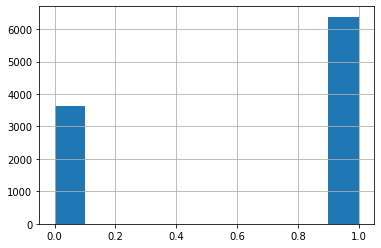

In [33]:
df['Zero Balance'].hist()

In [34]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

In [35]:

df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [36]:
X = df.drop(['Surname', 'Churn'],axis =1)

In [37]:

y = df['Churn']

In [38]:
X.shape,y.shape

((10000, 11), (10000,))

In [39]:

df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

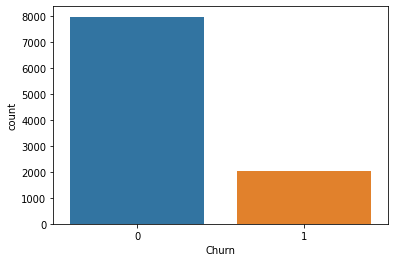

In [40]:
sns.countplot(x = 'Churn', data =df);

In [41]:
X.shape,y.shape

((10000, 11), (10000,))

Random Under Sampling

In [42]:
from imblearn.under_sampling import RandomUnderSampler

In [43]:
rus =RandomUnderSampler(random_state=12529)

In [44]:
X_rus, y_rus = rus.fit_resample(X,y)

In [45]:
X_rus.shape,y_rus.shape,X.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [46]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [47]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

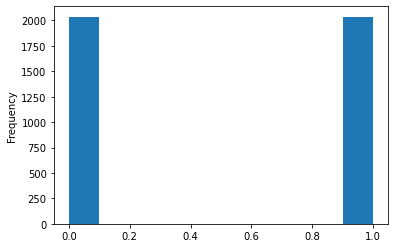

In [48]:
y_rus.plot(kind ='hist')

Random Over Sampling

In [49]:
from imblearn.over_sampling import RandomOverSampler


In [50]:
ros = RandomUnderSampler(random_state=12529)

In [51]:
X_ros, y_ros = ros.fit_resample(X,y)

In [52]:
X_ros.shape, y_ros.shape, X.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [53]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

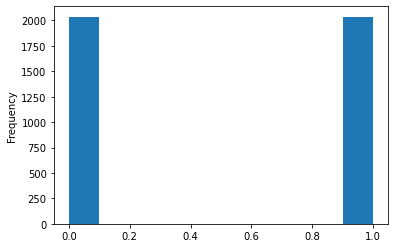

In [54]:
y_ros.plot(kind ='hist')

Train Test Split

In [55]:
from sklearn.model_selection import train_test_split

Split Original Data

In [56]:
X_train,X_test,y_train, y_test =train_test_split(X,y,test_size=0.3,random_state =12529)

Split Random Under Sample Data

In [57]:
X_train_rus,X_test_rus,y_train_rus,y_test_rus = train_test_split(X_rus,y_rus,test_size=0.7)

Split Random Over Sample Data

In [58]:
X_train_ros,X_test_ros,y_train_ros,y_test_ros = train_test_split(X_ros,y_ros, test_size=0.7)

Standardize Features

In [59]:
from sklearn.preprocessing import StandardScaler


In [60]:
sc= StandardScaler()

satandarize Original Data

In [61]:
X_train[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


In [62]:
X_test[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


Standardize Random Under Sample Data

In [63]:
X_train_rus[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


In [64]:
X_test_rus[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


Standardize Random Over Sample Data



In [65]:
X_train_ros[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


In [66]:
X_test_ros[['CreditScore','Age', 'Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


Support Vector Machine Classifier




In [67]:
from sklearn.svm import SVC


In [68]:
svc =SVC()


In [69]:
svc.fit(X_train,y_train)


SVC()

In [70]:
y_pred = svc.predict(X_test)


Model Accuracy



In [71]:
from sklearn.metrics import confusion_matrix, classification_report


In [72]:
confusion_matrix(y_test, y_pred)


array([[2321,   31],
       [ 491,  157]])

In [73]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2352
           1       0.84      0.24      0.38       648

    accuracy                           0.83      3000
   macro avg       0.83      0.61      0.64      3000
weighted avg       0.83      0.83      0.79      3000



Hyper Parmeter Tunning



In [74]:
from sklearn.model_selection import GridSearchCV


In [75]:
param_grid = {'C': [0.1,1,10],
              'gamma': [1,0.1,0.01],'kernel': ['rbf'], 
              'class_weight': ['balanced']}

In [76]:
grid = GridSearchCV(SVC(),param_grid, refit =True,verbose=2,cv= 2)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [77]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [78]:
grid_predictions = grid.predict(X_test)

In [79]:
confusion_matrix(y_test,grid_predictions)

array([[2116,  236],
       [ 427,  221]])

In [80]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2352
           1       0.48      0.34      0.40       648

    accuracy                           0.78      3000
   macro avg       0.66      0.62      0.63      3000
weighted avg       0.76      0.78      0.76      3000



Model with Random Under Sampling

In [81]:
svc_rus =SVC()

In [82]:
svc_rus.fit(X_train_rus,y_train_rus)

SVC()

In [83]:
svc.predict(X_test_rus)


array([0, 1, 1, ..., 0, 0, 0])

Model Accuracy



In [84]:
confusion_matrix(y_test,grid_predictions)


array([[2116,  236],
       [ 427,  221]])

In [85]:
print(classification_report(y_test,grid_predictions))


              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2352
           1       0.48      0.34      0.40       648

    accuracy                           0.78      3000
   macro avg       0.66      0.62      0.63      3000
weighted avg       0.76      0.78      0.76      3000



Hyperparameter Tunning



In [86]:
param_grid = {'C': [0.1,1,10],
              'gamma': [1,0.1,0.01],'kernel': ['rbf'], 
              'class_weight': ['balanced']}

In [87]:
grid_rus = GridSearchCV(SVC(),param_grid, refit =True,verbose=2,cv= 2)
grid_rus.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.7s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [88]:
print(grid_rus.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [89]:
grid_predictions_rus = grid_rus.predict(X_test_rus)


In [90]:
confusion_matrix(y_test_rus,grid_rus.predict(X_test_rus))


array([[1378,   31],
       [ 315, 1128]])

In [91]:
print(classification_report(y_test_rus,grid_predictions_rus))


              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1409
           1       0.97      0.78      0.87      1443

    accuracy                           0.88      2852
   macro avg       0.89      0.88      0.88      2852
weighted avg       0.89      0.88      0.88      2852



Model with Random over Sampling



In [92]:
svc_ros = SVC()


In [93]:
svc_ros.fit(X_train_ros,y_train_ros)


SVC()

In [94]:
y_pred_ros = svc_ros.predict(X_test_ros)


Model Accuracy



In [95]:
confusion_matrix(y_test_ros,y_pred_ros)


array([[1084,  353],
       [ 402, 1013]])

In [96]:
print(classification_report(y_test_ros,y_pred_ros))


              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1437
           1       0.74      0.72      0.73      1415

    accuracy                           0.74      2852
   macro avg       0.74      0.74      0.74      2852
weighted avg       0.74      0.74      0.74      2852



Hyperparameter Tunning



In [97]:
param_grid = {'C': [0.1,1,10],
              'gamma': [1,0.1,0.01],'kernel': ['rbf'], 
              'class_weight': ['balanced']}

In [98]:
grid_ros = GridSearchCV(SVC(),param_grid, refit =True,verbose=2,cv= 2)
grid_ros.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [99]:
print(grid_ros.best_estimator_)


SVC(C=10, class_weight='balanced', gamma=1)


In [100]:
grid_predictions_ros = grid_ros.predict(X_test_ros)


In [101]:
confusion_matrix(y_test_ros,grid_predictions_ros)


array([[1397,   40],
       [ 308, 1107]])

In [102]:
print(classification_report(y_test_ros,grid_predictions_ros))


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1437
           1       0.97      0.78      0.86      1415

    accuracy                           0.88      2852
   macro avg       0.89      0.88      0.88      2852
weighted avg       0.89      0.88      0.88      2852



Lets compare



In [103]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2352
           1       0.84      0.24      0.38       648

    accuracy                           0.83      3000
   macro avg       0.83      0.61      0.64      3000
weighted avg       0.83      0.83      0.79      3000



In [104]:
print(classification_report(y_test,grid_predictions))


              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2352
           1       0.48      0.34      0.40       648

    accuracy                           0.78      3000
   macro avg       0.66      0.62      0.63      3000
weighted avg       0.76      0.78      0.76      3000



In [105]:
print(classification_report(y_test_rus,grid_predictions_rus))


              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1409
           1       0.97      0.78      0.87      1443

    accuracy                           0.88      2852
   macro avg       0.89      0.88      0.88      2852
weighted avg       0.89      0.88      0.88      2852



In [106]:
print(classification_report(y_test_ros,y_pred_ros))


              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1437
           1       0.74      0.72      0.73      1415

    accuracy                           0.74      2852
   macro avg       0.74      0.74      0.74      2852
weighted avg       0.74      0.74      0.74      2852



In [107]:
print(classification_report(y_test_ros,grid_predictions_ros))


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1437
           1       0.97      0.78      0.86      1415

    accuracy                           0.88      2852
   macro avg       0.89      0.88      0.88      2852
weighted avg       0.89      0.88      0.88      2852

